In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
wine_df=pd.read_csv('winequalityN.csv')
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#number of rows and columns respectivly:
wine_df.shape

(6497, 13)

In [4]:
#checking the null values in each column:
wine_df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
#removing the null values:
wine_df.dropna(inplace=True)
#beacuse the na values are few we can drop them but if the na values are a lot or they are 
#important to the analysis, we can replace them with another values:
#wine_df.update(wine_df.fillna(wine_df.mean())).....here we are replacing the na values with the avreage valuein that column

In [6]:
#checking the count of the types of wine(white,red)
wine_df['type'].value_counts()

white    4870
red      1593
Name: type, dtype: int64

In [7]:
#if we want to see the percentage not the count, we add an argument to the value_count(normalize=True)
wine_df['type'].value_counts(normalize=True)

white    0.75352
red      0.24648
Name: type, dtype: float64

In [8]:
#checking the average quality of the red and white wine:
wine_type_df=wine_df[['type','quality']]
wine_quality=wine_type_df.groupby(by='type').mean()
wine_quality

,quality
type,
red,5.636535
white,5.878029


<AxesSubplot:xlabel='type', ylabel='count'>

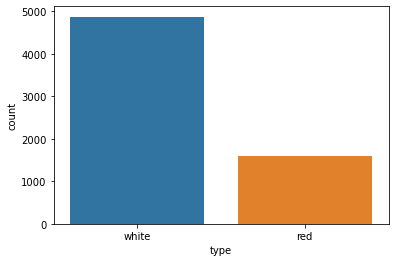

In [10]:
#plotint the percentage of the each of the produced wines:
sns.countplot(x='type',data=wine_df)

C:\Users\Heat\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

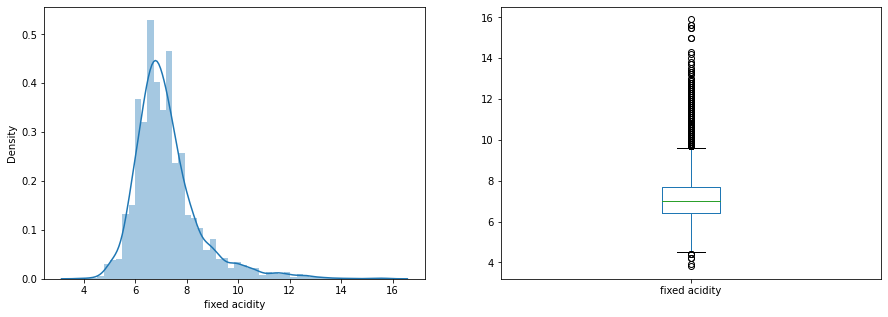

In [13]:
#checking the distrubtion of each column (single variable analysis)
plt.figure(2)  # means plot 2 figures
plt.subplot(121)  # fisrt plot:(1 means 1 row, 2 means columns)
sns.distplot(wine_df['fixed acidity'])  # the type of the first plot
plt.subplot(122)  # the second plot
wine_df['fixed acidity'].plot.box(figsize=(15,5))   # the type of the second plot

C:\Users\Heat\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

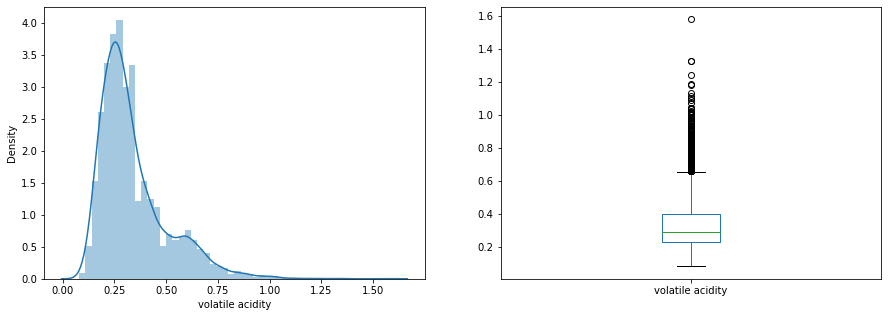

In [14]:
plt.figure(2)
plt.subplot(121)  
sns.distplot(wine_df['volatile acidity'])
plt.subplot(122)
wine_df['volatile acidity'].plot.box(figsize=(15,5))

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

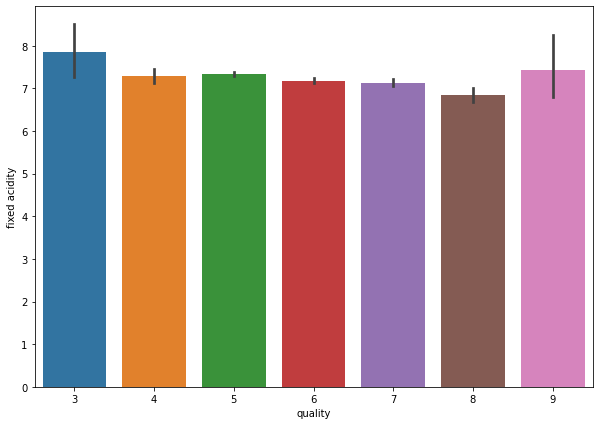

In [16]:
# two variable analysis:(quality of wine vs. column_name(we will test the quality against diff. columns)):
plt.figure(figsize=(10,7))
sns.barplot(x='quality',y='fixed acidity', data=wine_df)


Text(0.5, 1.0, 'variation of the wine quality based on the residual sugar quantity')

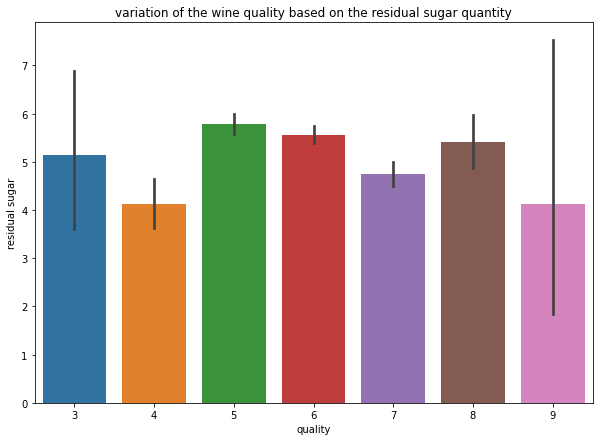

In [21]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality',y='residual sugar', data=wine_df)
plt.title('variation of the wine quality based on the residual sugar quantity')


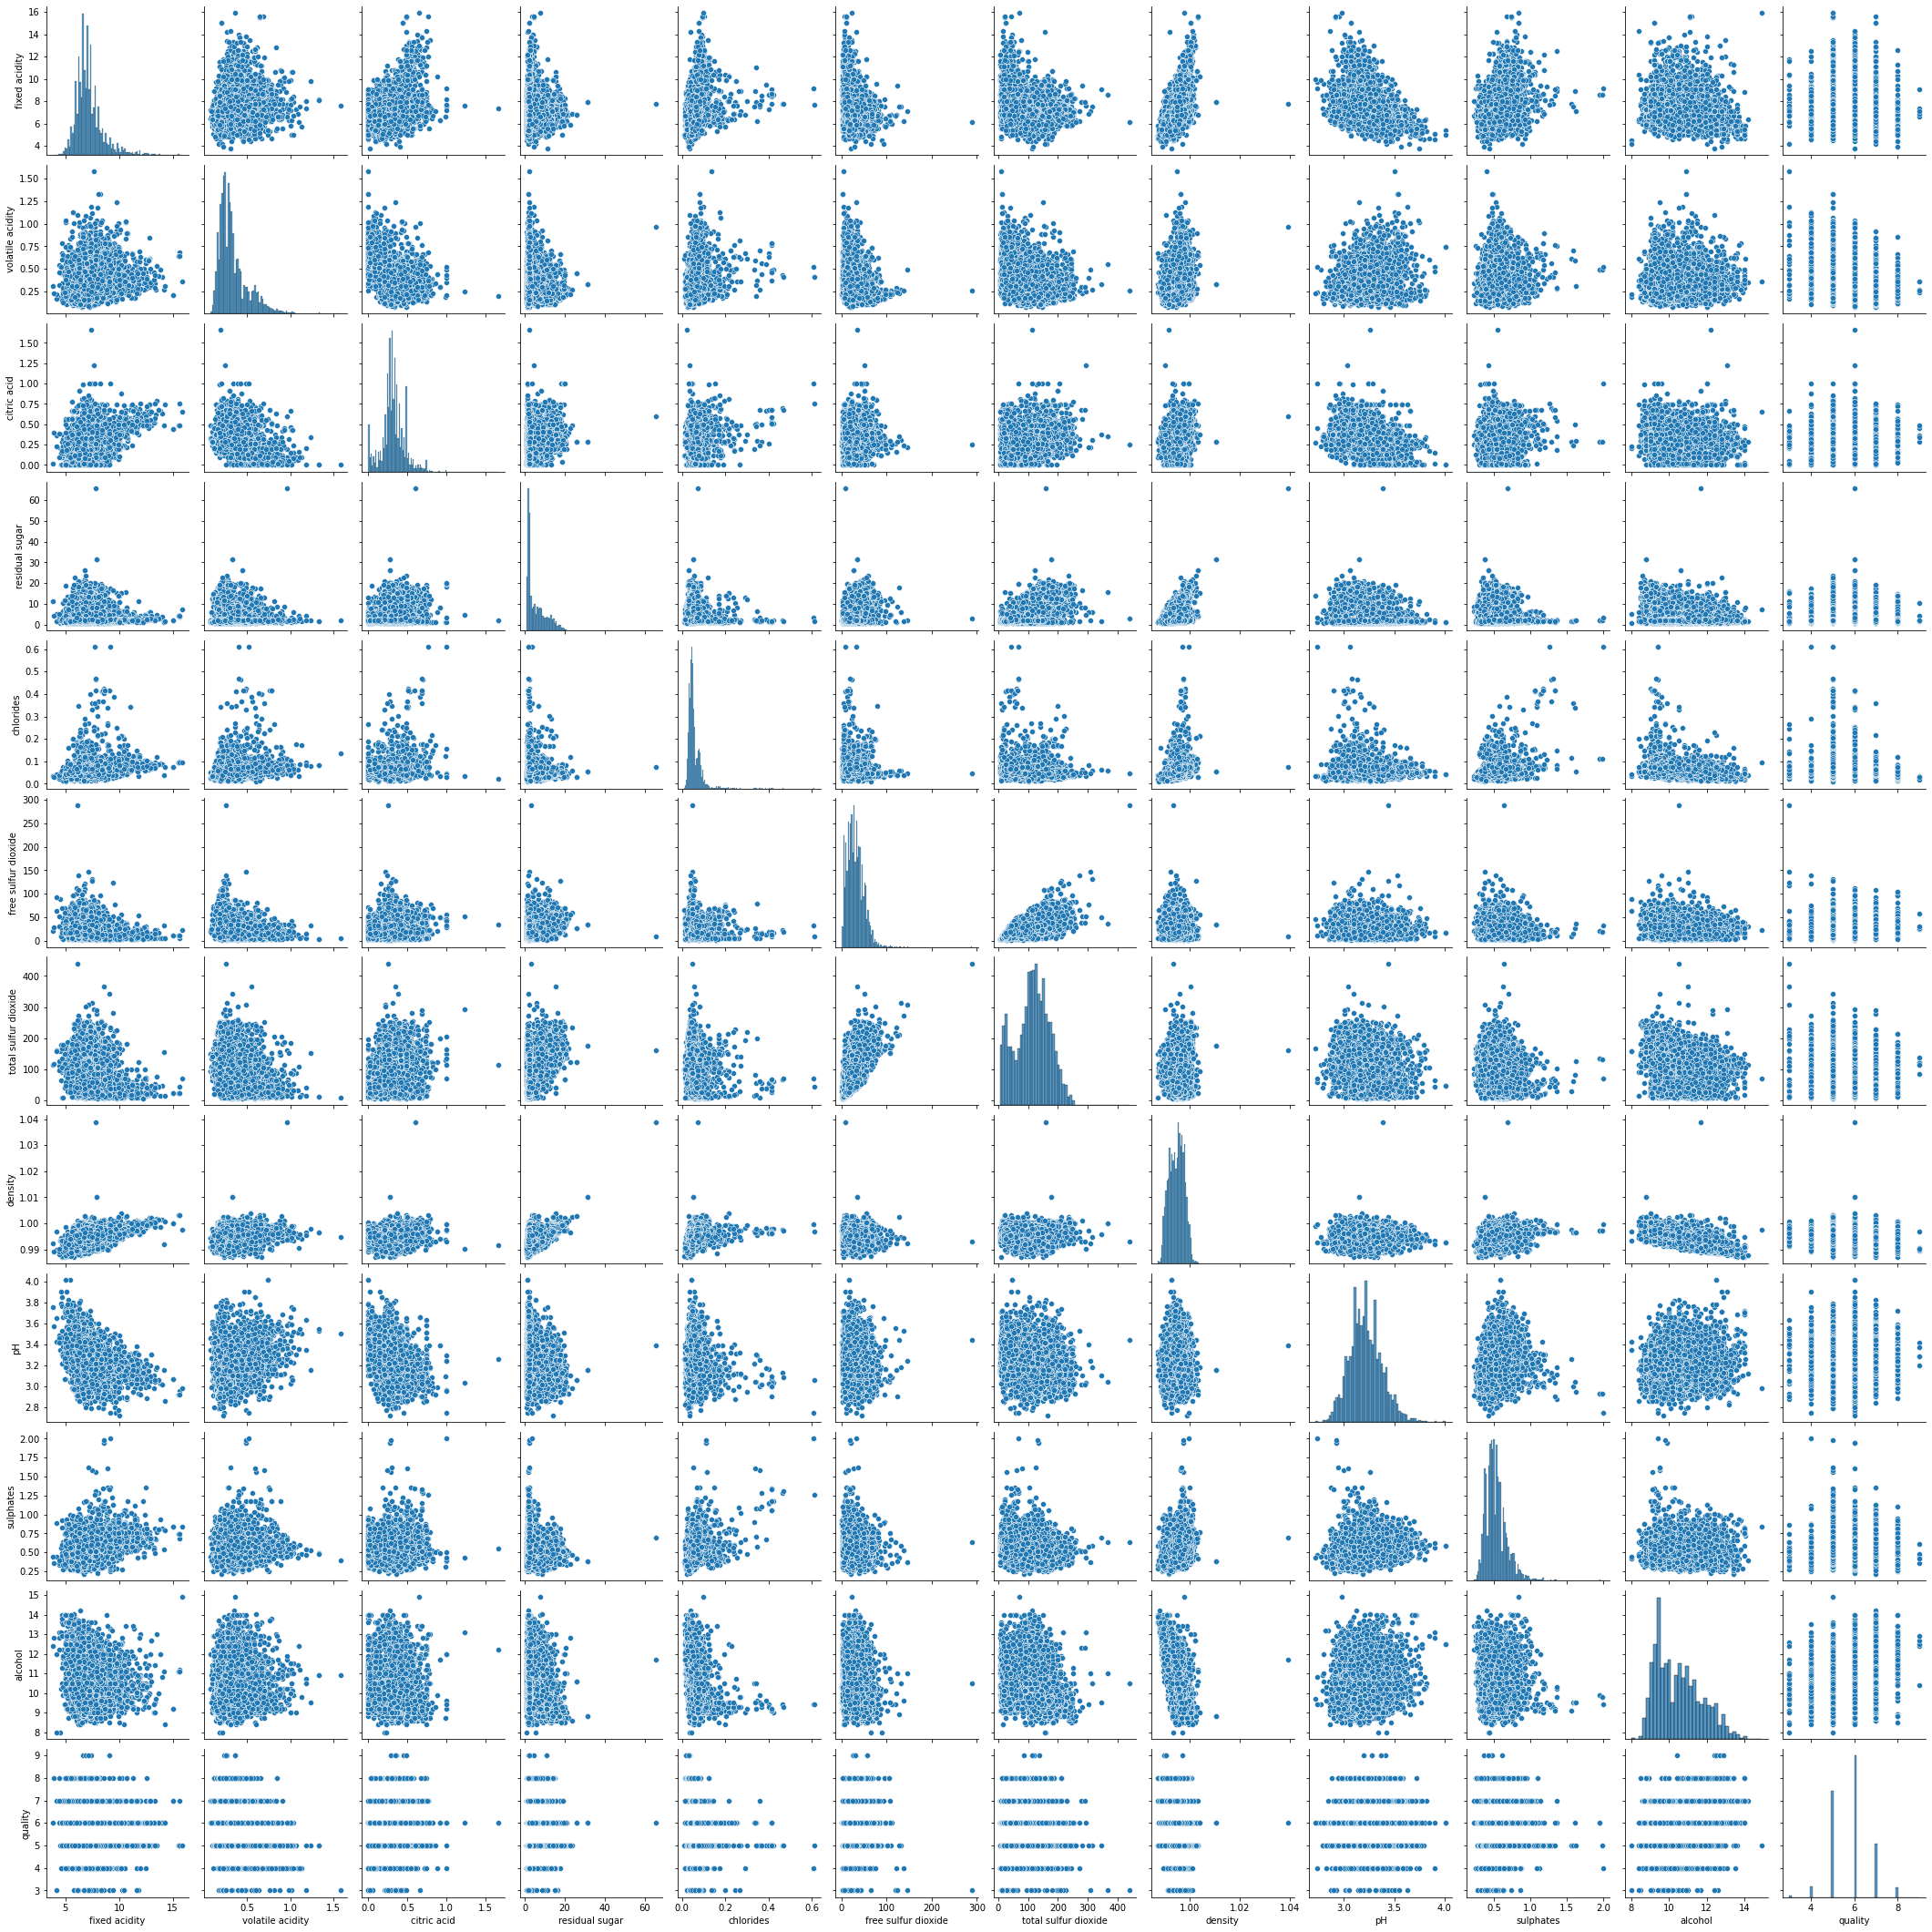

In [22]:
#multiple variables analysis(ex: scater plot, lineplot...):
sns.pairplot(wine_df)

In [23]:
#checking some correlation between our data:
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.221066,0.323744,-0.113442,0.299104,-0.283485,-0.330543,0.459713,-0.251121,0.301263,-0.096190,-0.076174
volatile acidity,0.221066,1.000000,-0.377512,-0.196677,0.377995,-0.353402,-0.414729,0.272101,0.260134,0.225656,-0.039528,-0.266677
citric acid,0.323744,-0.377512,1.000000,0.142324,0.039412,0.132271,0.194398,0.097068,-0.327860,0.059070,-0.010056,0.084926
residual sugar,-0.113442,-0.196677,0.142324,1.000000,-0.128814,0.403449,0.495684,0.551494,-0.266481,-0.185616,-0.359132,-0.034654
chlorides,0.299104,0.377995,0.039412,-0.128814,1.000000,-0.195428,-0.279602,0.363108,0.044653,0.396240,-0.257664,-0.200553
free sulfur dioxide,-0.283485,-0.353402,0.132271,0.403449,-0.195428,1.000000,0.721476,0.025113,-0.145164,-0.188947,-0.179477,0.054924
total sulfur dioxide,-0.330543,-0.414729,0.194398,0.495684,-0.279602,0.721476,1.000000,0.031419,-0.237204,-0.275878,-0.264385,-0.041598
density,0.459713,0.272101,0.097068,0.551494,0.363108,0.025113,0.031419,1.000000,0.012525,0.260019,-0.687432,-0.304447
pH,-0.251121,0.260134,-0.327860,-0.266481,0.044653,-0.145164,-0.237204,0.012525,1.000000,0.190864,0.120473,0.018403
sulphates,0.301263,0.225656,0.059070,-0.185616,0.396240,-0.188947,-0.275878,0.260019,0.190864,1.000000,-0.004116,0.039054


<AxesSubplot:>

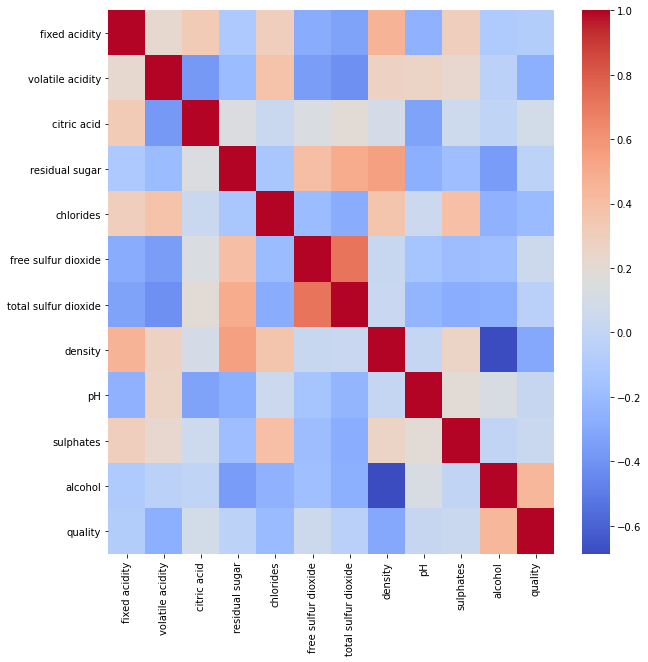

In [25]:
#ploting a heat map:
plt.figure(figsize=(10,10))
sns.heatmap(wine_df.corr(),cmap='coolwarm')

In [26]:
#we notice that some parameter have a very strong positive(total sulfur dioxid and free sulfur dioxid) colleration or a very strong negative colleration(alcohol and density)
#and somtimes such extream collerations can affect the general analysis
#to remove such values
#wine_newdf=wine_df.drop('column_name:free sulfur dioxid')


In [30]:
#if want to convert the type of the wine into numerical catagerical variables 0 and 1
wine=pd.get_dummies(wine_df, drop_first=True)
wine.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
6485,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6,0
6487,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5,0
6488,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6,0
6489,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6,0
6490,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,0


In [31]:
#transforming the qulilty of the wine to good wine or bad wine instead of scaling it (above 7 is good(1) otherwise is bad(0)):
y=wine['quality'].apply(lambda y: 1 if y>7 else 0)
y

0       0
1       0
2       0
3       0
4       0
       ..
6491    0
6492    0
6494    0
6495    0
6496    0
Name: quality, Length: 6463, dtype: int64

In [34]:
x=wine.drop('quality', axis=1)

In [37]:
# Sandariying the values in the dataset so that the high difference(some are very high and others are very low) btn the data donnt affect the model:
from sklearn.preprocessing import StandardScaler
#initialzing the standardscaler
scaler= StandardScaler()
#fitting the x variable into the scaler model
scaler.fit(x)
x_standard=scaler.transform(x)

In [41]:
x=x_standard
x

array([[-0.16778609, -0.42270958,  0.2839587 , ..., -0.5449872 ,
        -1.41892232,  0.5719307 ],
       [-0.70715516, -0.2404789 ,  0.14625658, ..., -0.27635393,
        -0.83218392,  0.5719307 ],
       [ 0.67979387, -0.36196602,  0.55936296, ..., -0.61214551,
        -0.32926528,  0.5719307 ],
       ...,
       [-0.70715516,  1.03513588, -1.29961576, ...,  1.46976231,
         0.42511267, -1.74846359],
       [-1.01536606,  1.85517396, -1.36846682, ...,  1.20112905,
        -0.24544551, -1.74846359],
       [-0.93831333, -0.17973534,  1.0413204 , ...,  0.86533746,
         0.42511267, -1.74846359]])

In [42]:
#training the data after transforming it:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.2, random_state=245)
# the random_state arrgument is used to rpeat the training to see if it produces the same output and its value can be specified as we wish

In [44]:
#logistic regression model
from sklearn.linear_model import LogisticRegression

In [45]:
#initializing the model
logreg=LogisticRegression()
#fitting the model into our trained data
logreg.fit(x_train,y_train)

LogisticRegression()

In [47]:
#predicting a value which are the testing values
y_pred=logreg.predict(x_test)

In [50]:
#testing the trained data vs the predicted data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
#this score mut be provided first with the acutal values(test values) then the predicted values
accuracy_score(y_test,y_pred)

0.9706109822119103

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1256
           1       0.00      0.00      0.00        37

    accuracy                           0.97      1293
   macro avg       0.49      0.50      0.49      1293
weighted avg       0.94      0.97      0.96      1293



In [54]:
print(confusion_matrix(y_test,y_pred))

[[1255    1]
 [  37    0]]


In [55]:
#random forest model
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc=RandomForestClassifier()

In [57]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
y_prid=rfc.predict(x_test)

In [61]:
accuracy_score(y_test,y_prid)

0.979891724671307

In [62]:
#this function describes the important features from the rfc model and puts them into arry so that we are able to plot them
rfc.feature_importances_

array([0.08163762, 0.08521492, 0.07203316, 0.10094211, 0.08484587,
       0.09720243, 0.08546065, 0.10318852, 0.08808854, 0.08921644,
       0.10979864, 0.00237111])

<AxesSubplot:>

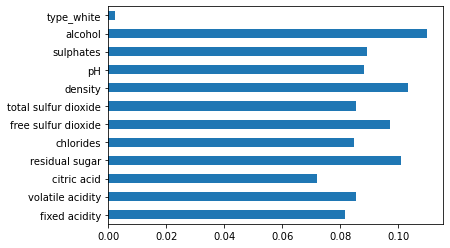

In [64]:
#visualizing our model:
#using the Sieries fun from the panda library we are providing x value as in rfc.fearure_importances and the y value which is the quality column then ploting them in a horiyantal barplot
pd.Series(rfc.feature_importances_ , index=wine.drop('quality', axis=1).columns).plot(kind='barh')